In [119]:
import pandas as pd

df = pd.read_csv("/content/train.csv")

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [120]:
missing_values_count = df.isnull().sum()
print(missing_values_count)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [121]:
summary_stats = df.describe()
print(summary_stats)

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [122]:
df["Age"].fillna(df["Age"].median(), inplace=True)
df.drop("Cabin", axis=1, inplace=True)
missing_values_count = df.isnull().sum()
print(missing_values_count)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64


<ipython-input-122-259acf5af396>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)


In [123]:
df["Sex"] = df["Sex"].map({"male": 1, "female": 0})
df = pd.get_dummies(df, columns=["Embarked"], drop_first=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,False,False
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,False,True
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,False,True


In [124]:
import matplotlib.pyplot as plt
import seaborn as sns

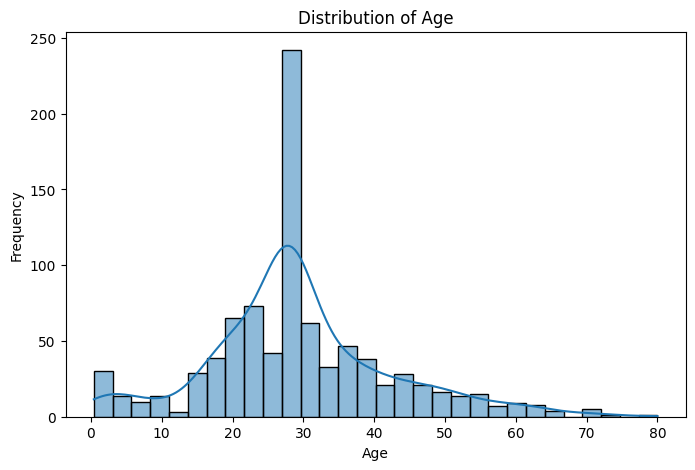

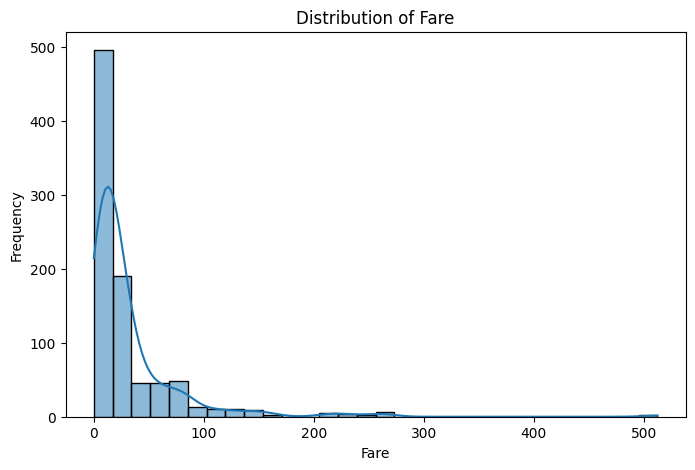

In [125]:
plt.figure(figsize=(8,5))
sns.histplot(df["Age"], kde=True, bins=30)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df["Fare"], kde= True, bins=30)
plt.title("Distribution of Fare")
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.show()

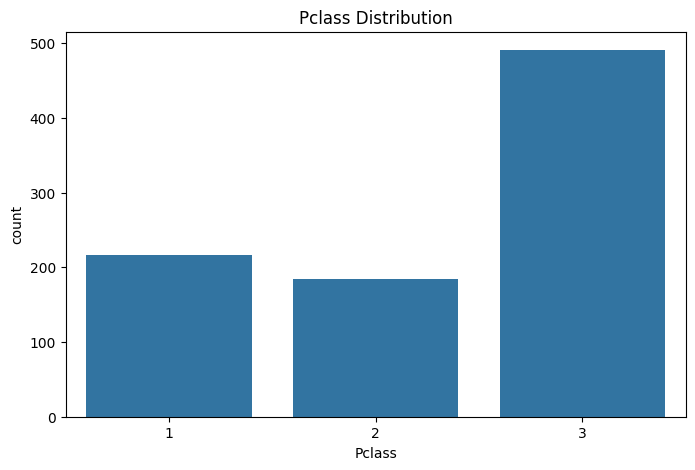

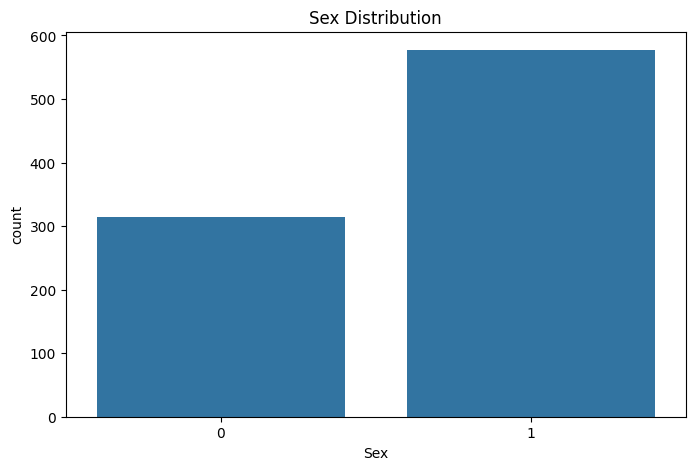

In [126]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Pclass', data=df)
plt.title('Pclass Distribution')
plt.show()


plt.figure(figsize=(8, 5))
sns.countplot(x='Sex', data=df)
plt.title('Sex Distribution')
plt.show()

In [127]:
from sklearn.model_selection import train_test_split

X = df.drop(['Survived', 'Name', 'Ticket', 'PassengerId','Embarked_Q',	'Embarked_S'], axis=1)
y = df['Survived']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)


In [128]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


logreg_model = LogisticRegression()


logreg_model.fit(X_train, y_train)


y_pred = logreg_model.predict(X_valid)


accuracy = accuracy_score(y_valid, y_pred)
print(f'Logistic Regression Accuracy: {accuracy}')


Logistic Regression Accuracy: 0.8100558659217877


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [129]:
from sklearn.ensemble import RandomForestClassifier


rf_model = RandomForestClassifier(random_state=42)


rf_model.fit(X_train, y_train)


y_pred_rf = rf_model.predict(X_valid)


accuracy_rf = accuracy_score(y_valid, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf}')


Random Forest Accuracy: 0.7988826815642458


In [130]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


logreg_model = LogisticRegression(solver='lbfgs', random_state=42)


param_grid_logreg = {
    'C': [0.01, 0.1, 1, 10, 100],
    'max_iter': [100, 200, 300],
}


grid_search_logreg = GridSearchCV(estimator=logreg_model, param_grid=param_grid_logreg,
                                  cv=5, n_jobs=-1, verbose=2, scoring='accuracy')


grid_search_logreg.fit(X_train, y_train)


print(f'Best Parameters (Logistic Regression): {grid_search_logreg.best_params_}')
print(f'Best Cross-validation Accuracy (Logistic Regression): {grid_search_logreg.best_score_}')


Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best Parameters (Logistic Regression): {'C': 0.1, 'max_iter': 100}
Best Cross-validation Accuracy (Logistic Regression): 0.7906727075741161


In [131]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


rf_model = RandomForestClassifier(random_state=42)


param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}


grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')


grid_search.fit(X_train, y_train)


print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Cross-validation Accuracy: {grid_search.best_score_}')


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Best Cross-validation Accuracy: 0.832837584950261


In [132]:

best_rf_model = RandomForestClassifier(max_depth=30,
                                       min_samples_leaf=1,
                                       min_samples_split=5,
                                       n_estimators=50,
                                       random_state=42)


best_rf_model.fit(X_train, y_train)


y_pred_rf_final = best_rf_model.predict(X_valid)
accuracy_rf_final = accuracy_score(y_valid, y_pred_rf_final)
print(f'Final Random Forest Accuracy: {accuracy_rf_final}')


Final Random Forest Accuracy: 0.8268156424581006


In [133]:

best_logreg_model = LogisticRegression(C=0.1, max_iter=200, solver='lbfgs', random_state=42)


best_logreg_model.fit(X_train, y_train)


y_pred_logreg_final = best_logreg_model.predict(X_valid)
accuracy_logreg_final = accuracy_score(y_valid, y_pred_logreg_final)
print(f'Final Logistic Regression Accuracy: {accuracy_logreg_final}')


Final Logistic Regression Accuracy: 0.8212290502793296


In [134]:
test_data = pd.read_csv('/content/test.csv')



In [135]:
X_test = test_data.drop(['Name', 'Ticket', 'PassengerId', 'Cabin', 'Embarked'], axis=1)


X_test['Age'].fillna(X_test['Age'].median(), inplace=True)
X_test['Fare'].fillna(X_test['Fare'].median(), inplace=True)
X_test["Sex"] = X_test["Sex"].map({"male": 1, "female": 0})


<ipython-input-135-01ff9262d28f>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_test['Age'].fillna(X_test['Age'].median(), inplace=True)
<ipython-input-135-01ff9262d28f>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [136]:

test_predictions_logreg = best_logreg_model.predict(X_test)

test_predictions_rf = best_rf_model.predict(X_test)


In [137]:
submission = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': test_predictions_rf
})


submission.to_csv('titanic_submission.csv', index=False)
